# Data Driven Business project

-
-
- Rick van der Kleij
- Mathijs de Jong (V2B)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from cleaning import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree


### Importeren dataset

In [2]:
# Load the data
df = load_data('sap_storing_data_hu_project.csv')

# Data understanding

In [3]:
df.describe()

,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_mon_nr__statuscode,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,...,stm_fh_duur,stm_reactie_duur,stm_status_sapnaarmon,stm_schadenr,stm_rapportage_maand,stm_rapportage_jaar,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_vervallen_ind
count,8.985260e+05,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,326841.000000,741568.000000,6.057210e+05,...,898488.000000,8.984880e+05,326426.000000,7.617200e+05,898526.000000,898526.000000,898526.000000,898526.000000,8.985260e+05,898526.000000
mean,7.510690e+07,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,4.489137,321.455539,1.062666e+07,...,923.148771,8.845657e+07,1.228597,9.375142e+06,6.636797,2013.259139,0.630154,129220.532107,7.288544e+06,0.014005
std,1.113009e+07,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,2.911721,270.687469,4.755891e+05,...,6404.546787,2.712747e+08,0.479859,1.447590e+09,3.403174,3.643254,0.482763,166867.221302,4.569528e+06,0.117512
min,0.000000e+00,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.000001e+07,...,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,2006.000000,0.000000,0.000000,2.498014e+06,0.000000
25%,8.035472e+07,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,2.000000,79.000000,1.021172e+07,...,11.000000,1.800000e+01,1.000000,0.000000e+00,4.000000,2010.000000,0.000000,1518.000000,3.673258e+06,0.000000
50%,8.063615e+07,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,6.000000,203.000000,1.056452e+07,...,84.000000,6.700000e+01,1.000000,0.000000e+00,7.000000,2014.000000,1.000000,36941.000000,3.766232e+06,0.000000
75%,8.079029e+07,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,7.000000,545.000000,1.092778e+07,...,256.000000,1.318000e+03,1.000000,0.000000e+00,10.000000,2016.000000,1.000000,250780.000000,1.280449e+07,0.000000
max,1.000000e+08,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,9.000000,952.000000,3.039590e+07,...,528297.000000,1.060469e+09,3.000000,1.235051e+12,12.000000,2019.000000,1.000000,579394.000000,1.301291e+07,1.000000


# Data cleaning

In [4]:
# Define the columns to drop
columns_to_drop = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld',
                   'stm_scenario_mon', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd',
                   'stm_aanntpl_ddt', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt',
                   'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz',
                   'stm_veroorz_groep', 'stm_veroorz_code', 'stm_veroorz_tekst_kort', 'stm_effect', 'stm_afspr_aanvangddt',
                   'stm_mon_eind_ddt', 'stm_mon_vhdsincident', 'stm_dir_betrok_tr', 'stm_aangelegd_dd', 'stm_aangelegd_tijd',
                   'stm_mon_begindatum', 'stm_mon_begintijd', 'stm_progfh_gw_datum', 'stm_mon_eind_datum', 'stm_mon_eind_tijd',
                   'stm_controle_dd', 'stm_akkoord_mon_toewijz', 'stm_status_sapnaarmon', 'stm_fact_jn', 'stm_akkoord_melding_jn',
                   'stm_afsluit_ddt', 'stm_afsluit_dd', 'stm_afsluit_tijd', 'stm_rec_toegev_ddt', 'stm_hinderwaarde',
                   'stm_actie', 'stm_standplaats', 'stm_status_gebr', 'stm_wbi_nummer', 'stm_projnr', 'stm_historie_toelichting',
                   'stm_schade_verhaalb_jn', 'stm_schadenr', 'stm_schade_status_ga', 'stm_schade_statusdatum', 'stm_relatiervo_vorig',
                   'stm_relatiervo_volgend', 'stm_relatiervo', 'stm_afspr_func_hersteldd', 'stm_afspr_func_hersteltijd',
                   'stm_sorteerveld', 'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt', 'stm_x_bron_bestandsnaam',
                   'stm_x_bron_arch_dt', 'stm_x_actueel_ind', 'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt', 'stm_x_vervallen_ind']

# Drop the unnecessary columns
df = drop_columns(df, columns_to_drop)

# Clean the data (handle missing values, remove columns with excessive NaNs)
#df, avg_list, mode_list = clean_data(df)

# Filter de data op rijen met een totale_functiehersteltijd van tussen de 5 mins en 8 uur.
df = filter_data(df)

# Save the cleaned data to a new CSV (optional)
save_data(df, 'final_db_cleaned.csv')

# Display results (optional)
#print("Data cleaning complete.")
#print("Columns filled with averages: ", avg_list)
#print("Columns filled with mode: ", mode_list)
#print("Cleaned dataframe shape: ", df.shape)


In [5]:
# Tijdelijk
df[['stm_sap_meld_ddt', 'stm_fh_ddt', 'stm_progfh_in_invoer_tijd', 'stm_progfh_in_invoer_dat', 'totale_functiehersteltijd']].sample(10)
df['stm_progfh_in_invoer_tijd'].dtype

dtype('O')

# Baseline model

In [6]:
# Updated function to handle both scalar and array return types
def mode_per_group(group):
    mode_result = stats.mode(group, keepdims=True)  # Ensure it returns in an array-like format
    return mode_result.mode[0]  # Safely access the mode value

# Calculate baseline (mode) for each oorzaak code
baseline_modes = df.groupby('stm_oorz_code')['stm_fh_duur'].apply(mode_per_group).reset_index()
baseline_modes.columns = ['stm_oorz_code', 'baseline_fh_duur']

# Merge baseline values with the original DataFrame
df = df.merge(baseline_modes, on='stm_oorz_code')

# Calculate the difference between actual time and baseline (mode)
df['difference'] = df['stm_fh_duur'] - df['baseline_fh_duur']

In [7]:
# Mean Absolute Error (MAE)
mae = df['difference'].abs().mean()
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 98.0087244115639


In [8]:
# Check if the baseline prediction matches the actual time
df['correct_prediction'] = df['stm_fh_duur'] == df['baseline_fh_duur']

# Calculate the accuracy in percentage
accuracy = df['correct_prediction'].mean() * 100

# Print the accuracy
print(f'Accuracy of the baseline model: {accuracy:.2f}%')


Accuracy of the baseline model: 1.49%


In [9]:
# Verwijder spaties aan het begin en einde van de waarden
df['stm_progfh_in_duur_clean'] = df['stm_progfh_in_duur'].str.strip()

# Vervang ongeldige waarden door NaN en converteer naar numeriek
df['stm_progfh_in_duur_clean'] = pd.to_numeric(df['stm_progfh_in_duur_clean'], errors='coerce')

# Vul NaN-waarden in met de gemiddelde waarde (zonder inplace=True)
df['stm_progfh_in_duur_clean'] = df['stm_progfh_in_duur_clean'].fillna(df['stm_progfh_in_duur_clean'].mean())

Mean Squared Error: 2656039.5652596992
R² waarde: 0.000985803374901728


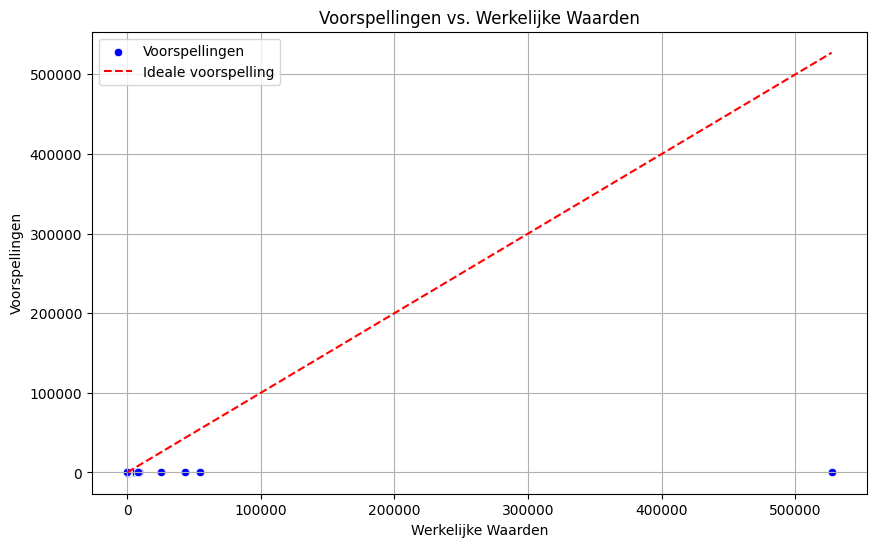

In [16]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code']]
y = df['stm_fh_duur']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineair regressiemodel aanmaken
model = LinearRegression()

# Train het model
model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred = model.predict(X_test)

# Bereken de evaluatiestatistieken
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}') 
print(f'R² waarde: {r2_dt}') 

# Plot de voorspellingen
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Voorspellingen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideale voorspelling')
plt.title('Voorspellingen vs. Werkelijke Waarden')
plt.xlabel('Werkelijke Waarden')
plt.ylabel('Voorspellingen')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code']]
y = df['stm_fh_duur']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor aanmaken
dt_model = DecisionTreeRegressor(random_state=42)

# Train het model
dt_model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_dt = dt_model.predict(X_test)

# Bereken de evaluatiestatistieken
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error van Decision Tree: {mse_dt}') 
print(f'R² waarde van Decision Tree: {r2_dt}') 

# Visualiseer de Decision Tree
# plt.figure(figsize=(12, 8))
# plot_tree(dt_model, feature_names=X.columns, filled=True)
# plt.title('Decision Tree voor stm_fh_duur')
# plt.show()


Mean Squared Error van Decision Tree: 2670027.530225311
R² waarde van Decision Tree: -0.005117813963969375


Mean Squared Error van Decision Tree: 2653813.68334852
R² waarde van Decision Tree: 0.000985803374901728


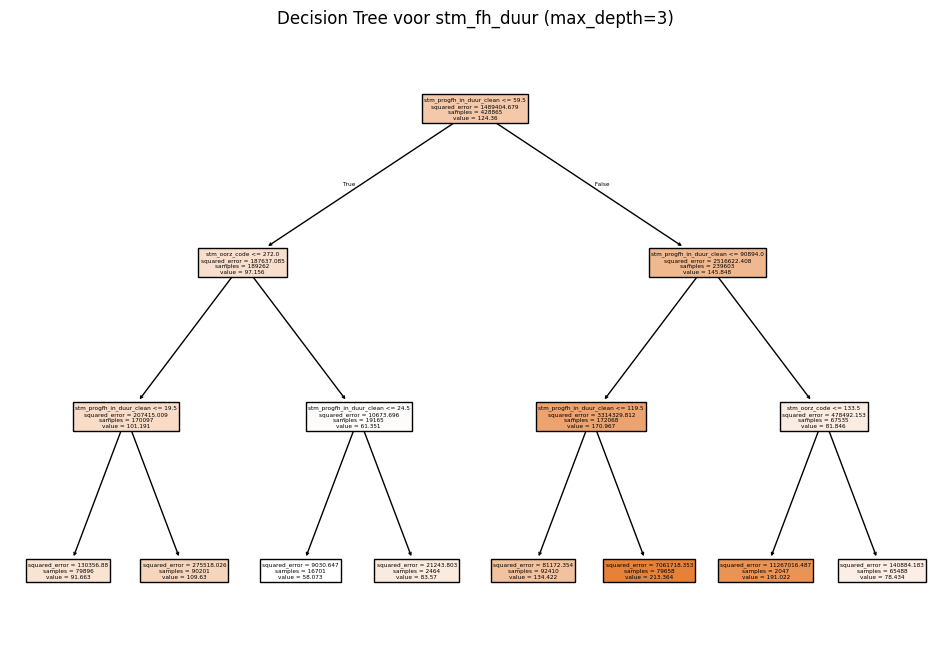

In [18]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code']]
y = df['stm_fh_duur']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor aanmaken met beperkte diepte
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train het model
dt_model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_dt = dt_model.predict(X_test)

# Bereken de evaluatiestatistieken
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error van Decision Tree: {mse_dt}') 
print(f'R² waarde van Decision Tree: {r2_dt}') 

# Visualiseer de Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title('Decision Tree voor stm_fh_duur (max_depth=3)')
plt.show()
